# Imports

In [1]:
# standard imports
import pandas as pd
import numpy as np
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# stats
from scipy import stats
# .py files with callable functions
import wrangle
# notebook formatting
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")

# Wrangle

In [2]:
# call data
df, train, test = wrangle.wrangle_data()

In [3]:
# summarize data/ inital glace at data
print('_'*50)
print(f'Shape: \n{df.shape}')
print('_'*50)
print(f'Stats: \n{df.describe().T}')
print('_'*50)
print('Info: ')
print(df.info())
print('_'*50)
print(f'Unique Value Count: \n{df.nunique()}')
print('_'*50)
df.head()

__________________________________________________
Shape: 
(75, 3)
__________________________________________________
Stats: 
      count         mean         std     min     25%     50%     75%     max
fmr    75.0  1079.466667   87.797576   964.0  1001.0  1051.0  1114.0  1286.0
mmr    75.0  1256.586667  174.212754  1001.0  1133.5  1221.0  1439.0  1555.0
diff   75.0   177.120000  102.401562     0.0   112.0   159.0   216.5   390.0
__________________________________________________
Info: 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75 entries, 2017-01-01 to 2023-03-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fmr     75 non-null     float64
 1   mmr     75 non-null     float64
 2   diff    75 non-null     float64
dtypes: float64(3)
memory usage: 2.3 KB
None
__________________________________________________
Unique Value Count: 
fmr      8
mmr     65
diff    63
dtype: int64
______________________________________

,fmr,mmr,diff
2017-01-01,964.0,1019.0,55.0
2017-02-01,964.0,1014.0,50.0
2017-03-01,964.0,1040.0,76.0
2017-04-01,964.0,1044.0,80.0
2017-05-01,964.0,1012.0,48.0


__Data Dictionary:__

   _Original Dataset_
   __________________________________________________________________
    fmr:         |Fair Market Rent/ HUD voucher amount
   __________________________________________________________________
    mmr:         |Median Market Rent
   __________________________________________________________________
    diff:        |Difference between fmr and mmr
   __________________________________________________________________
   
   _Created Columns_
   __________________________________________________________________
    dt:          |Date
   __________________________________________________________________

# Exploration

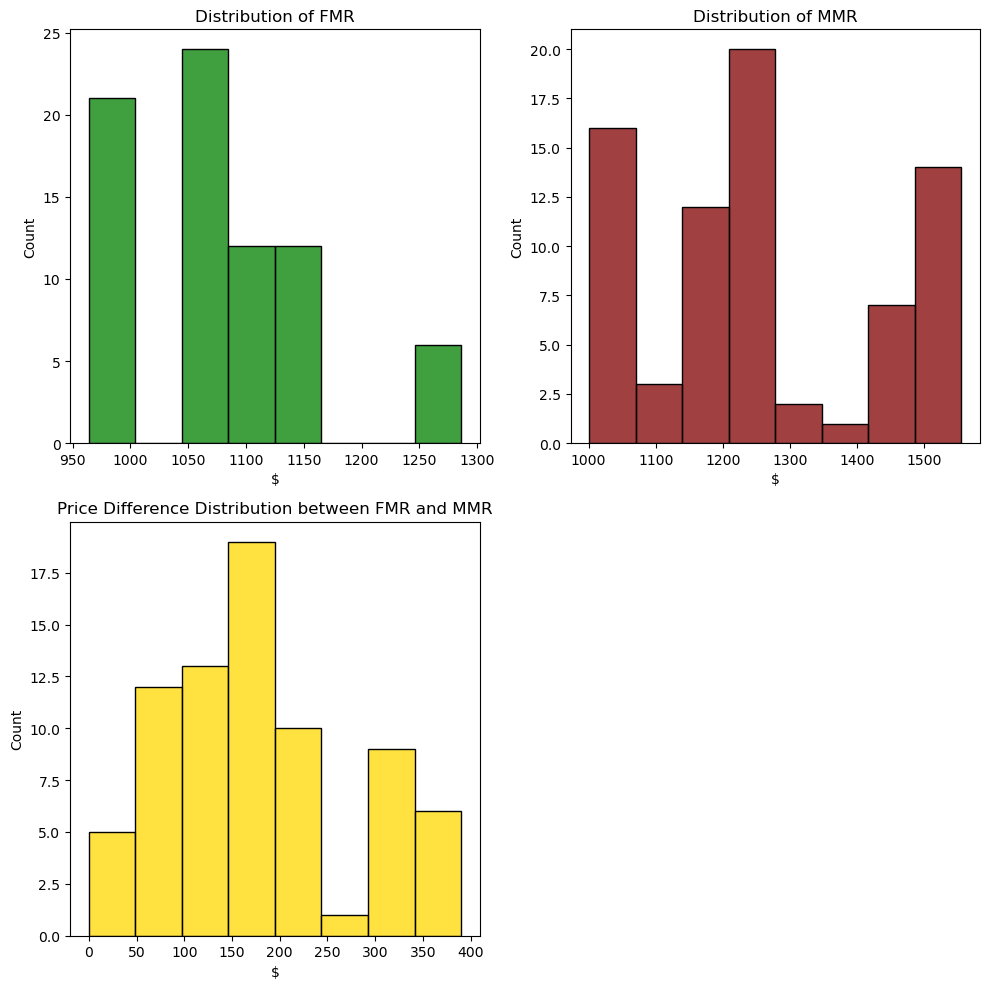

In [4]:
# histograms
plt.figure(figsize=(10,10))
# fmr
plt.subplot(221)
sns.histplot(data=df, x='fmr', color='green')
plt.xlabel("$")
plt.title('Distribution of FMR')
# mmr
plt.subplot(222)
sns.histplot(data=df, x='mmr', color='maroon')
plt.xlabel("$")
plt.title('Distribution of MMR')
# diff
plt.subplot(223)
sns.histplot(data=df, x='diff', color='gold')
plt.xlabel("$")
plt.title('Price Difference Distribution between FMR and MMR')
plt.tight_layout()
plt.show()

__FMR__

    - fmr has a distribution from 964 dollars - 1286 dollars.
    - 322 dollar difference between the lowest and highest fmr.
    - The distribution looks right skewed but may be cosinusoidal

__MMR__

    - mmr has a distribution from 1001 dollars - 1555 dollars
    - 554 dollar difference between the lowest and highest mmr.
    - The distribution appears cosinusoidal.

__Diff__

    - diff has a distribution from 0 dollars - 390 dollars
    - There is a 390 dollars difference between the lowest and highest diff.
    - The distribution appears normal, except for at approx 245 - 255 dollars there is a dip.

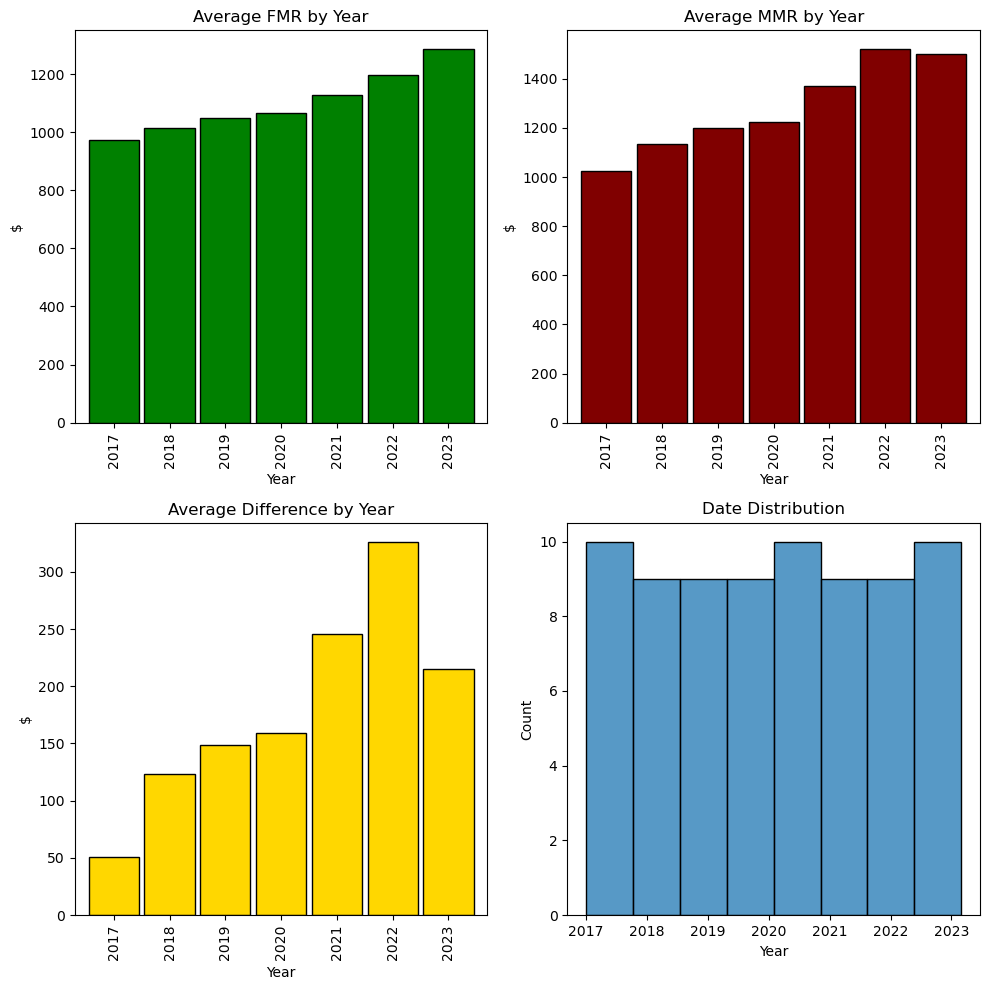

In [5]:
# bar charts
plt.figure(figsize=(10,10))
# fmr
plt.subplot(221)
df.fmr.groupby(df.index.year).mean().plot.bar(width=.9, ec='black', color='green')
plt.xlabel("Year")
plt.ylabel("$")
plt.title('Average FMR by Year')
# mmr
plt.subplot(222)
df.mmr.groupby(df.index.year).mean().plot.bar(width=.9, ec='black', color='maroon')
plt.xlabel("Year")
plt.ylabel("$")
plt.title('Average MMR by Year')
# diff
plt.subplot(223)
df['diff'].groupby(df.index.year).mean().plot.bar(width=.9, ec='black', color='gold')
plt.xlabel("Year")
plt.ylabel("$")
plt.title('Average Difference by Year')
# date
plt.subplot(224)
sns.histplot(data=df, x=df.index)
plt.xlabel("Year")
plt.title('Date Distribution')
plt.tight_layout()
plt.show()

__FMR__
    
    Positive linear increase
    
__MMR__

    Positive linear increase until 2023 where we see a slight decrease from 2022 but that is subject to change as we are only half way through the year.
    
__Diff__
    
    Excluding 2023, the trend is positively linear with a 600% increase in average difference between MMR and FMR from 2017 to 2022.
    Including 2023, the trend is left skewed. 2023 sees a sizable decrease in average difference between MMR and FMR from 2022 but is still more than the average difference in 2020 (possibly because of the rent moratorium).

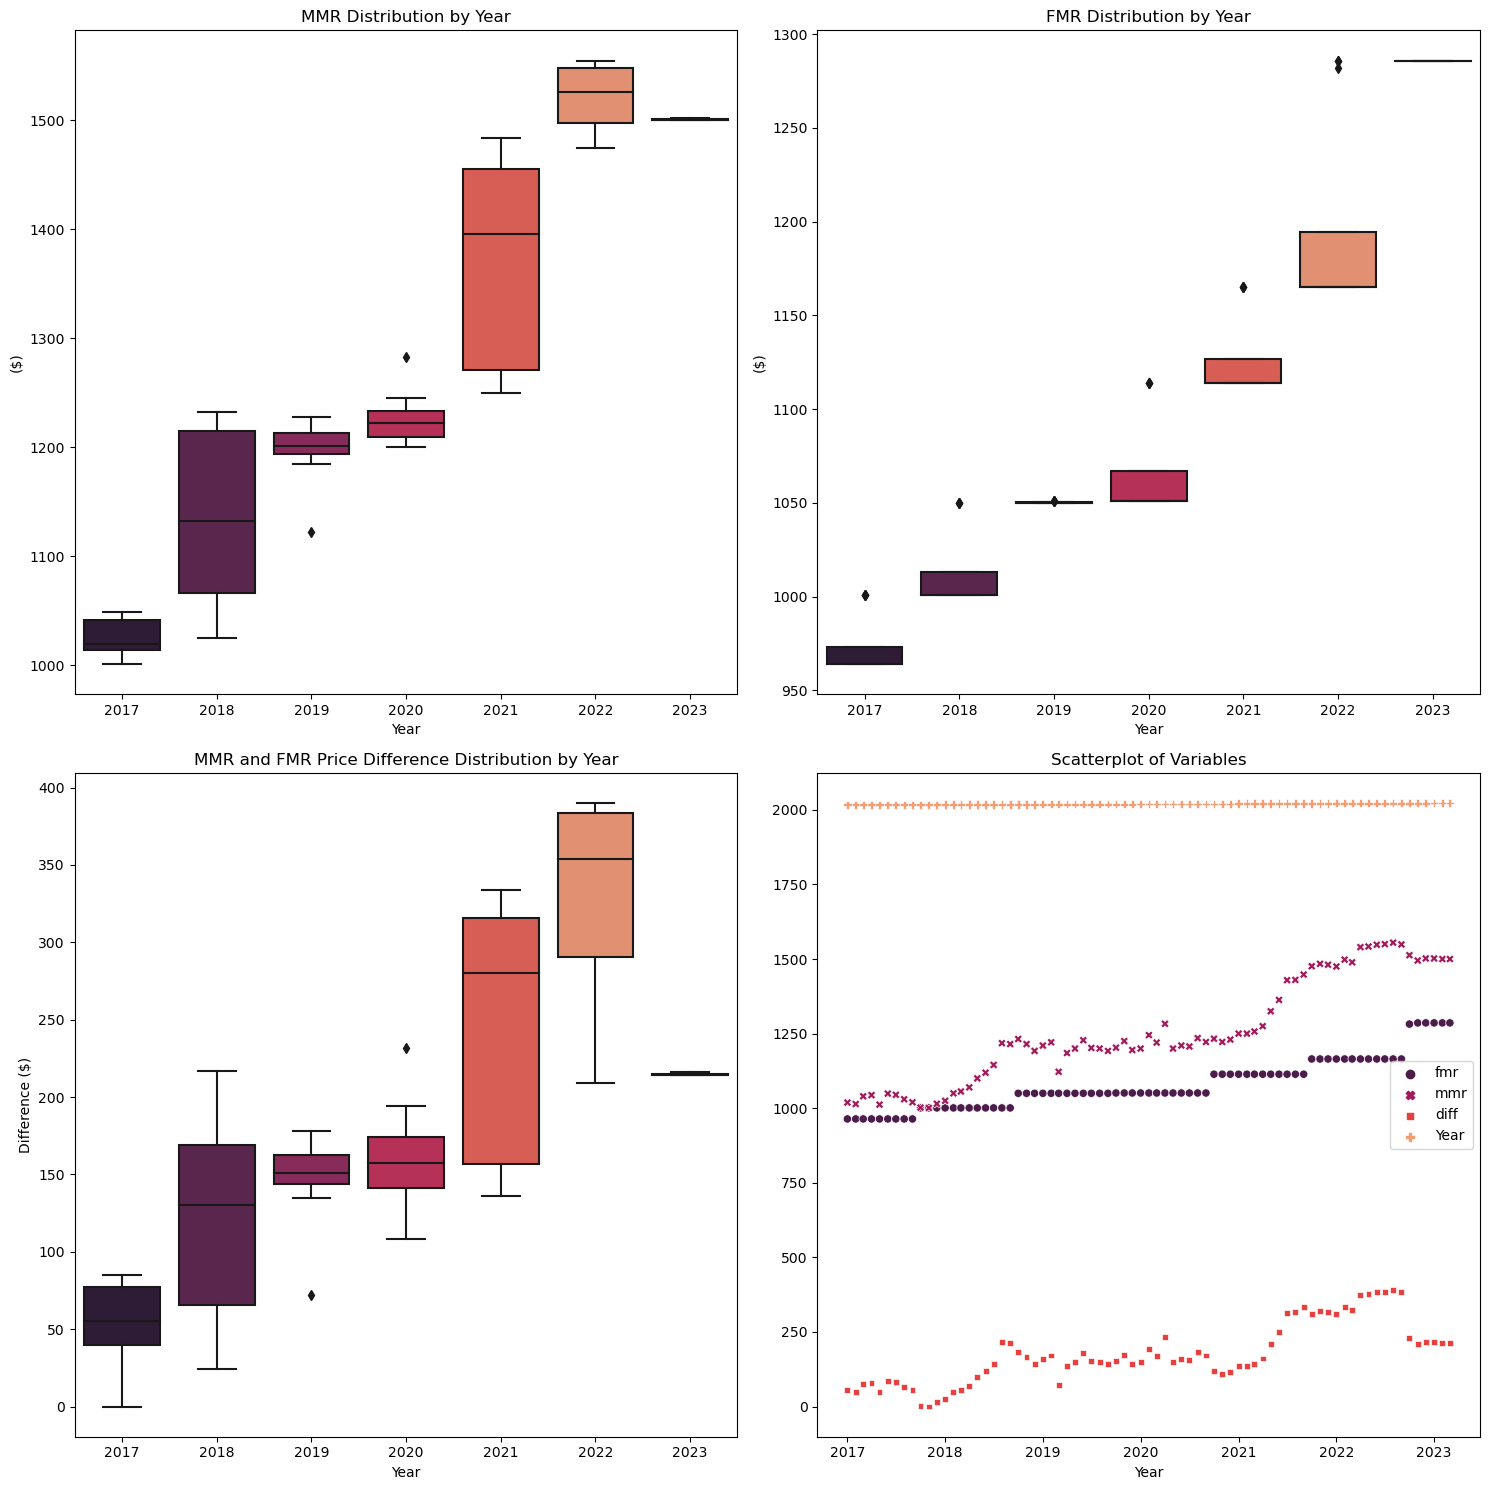

In [6]:
# Boxplots
# MMR
df['Year'] = df.index.year
grouped = df.groupby('Year')
year_data = []
for year, group in grouped:
    year_data.append(group['mmr'])        
num_years = len(year_data)
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.boxplot(data=year_data, palette='rocket')
plt.xticks(range(num_years), grouped.groups.keys())
plt.xlabel('Year')
plt.ylabel('($)')
plt.title('MMR Distribution by Year')
# FMR
year_data = []
for year, group in grouped:
    year_data.append(group['fmr'])        
num_years = len(year_data)
plt.subplot(222)
sns.boxplot(data=year_data, palette='rocket')
plt.xticks(range(num_years), grouped.groups.keys())
plt.xlabel('Year')
plt.ylabel('($)')
plt.title('FMR Distribution by Year')
# Difference
year_data = []
for year, group in grouped:
    year_data.append(group['diff'])        
num_years = len(year_data)
plt.subplot(223)
sns.boxplot(data=year_data, palette='rocket')
plt.xticks(range(num_years), grouped.groups.keys())
plt.xlabel('Year')
plt.ylabel('Difference ($)')
plt.title('MMR and FMR Price Difference Distribution by Year')
# FMR scatterplot
plt.subplot(224)
sns.scatterplot(data=df, palette='rocket')
plt.xlabel('Year')
plt.title('Scatterplot of Variables')
plt.tight_layout()
plt.show()

__FMR__
    
    Distribution by calender year is negligible because FMR is calculated by the fiscal year (Oct. 1). If I reimaged to only show the fiscal year we would be horizontal lines as pictured in Figure 4
    
__MMR__
    
    2019 and 2020 have outliers but they don't seem too relevent because in context they make sense. 2019's outlier is below the rest of the 2019 data, it seems reasonable for this outlier to exist as 2018 had a much larger MMR distribution most of it below 2019's MMR distribution
    2020's outlier is above the rest of the 2020 data. This makes sense because 2020 was the year the COVID-19 pandemic broke out and we saw inflation in several markets as demand increased.
    
__Diff__
    
    Trend is similar to MMR except for in 2023 we see difference takes a much more drastic decrease than MMR.
    2019 and 2020 outliers
    
__Figure 4__

    Figure is mainly for reference in FMR
    MMR and FMR overlap in 2018. There was no difference in MMR and FMR.
    Prior to Feb 2018 it appears difference isnt crazy high, but around March 2018 MMR begins to rise. That increase is halted around August 2018 - around May 2021 when we see a steady increase in MMR. It is interesting that the time period MMR increases halted appear almost negligible because a positive linear line could replace that gap.

In [7]:
# make the current index a column
df = df.reset_index()
# rename the former index/ new column 'date'
df = df.rename(columns={'index':'date'})
#df

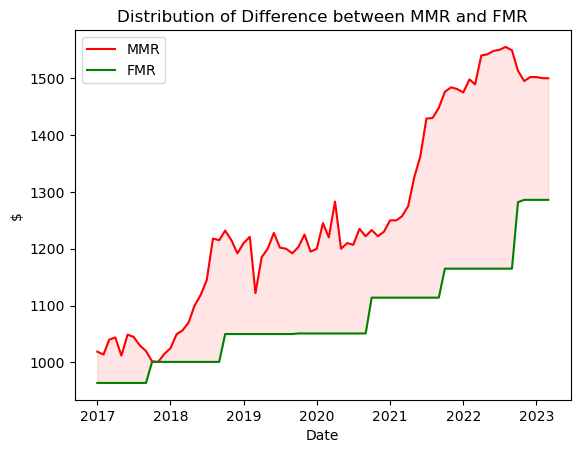

In [8]:
# plot the difference between MMR and FMR
plt.plot(df.date, df.mmr, color='red')
plt.plot(df.date, df.fmr, color='green')
plt.fill_between(df.date, df.mmr, df.fmr, color='red', alpha=0.1)
plt.legend(['MMR', 'FMR'])
plt.xlabel("Date")
plt.ylabel("$")
plt.title('Distribution of Difference between MMR and FMR')
plt.show()

In [9]:
# read in San Antonio pop csv as a dataframe
pop = pd.read_csv('sa_population.csv')
# rename columns to be lowercase and snakecase
pop = pop.rename(columns={' Population': 'population', ' Annual Change': 'annual_change'})
# convert date to dtype datetime
pop.date = pd.to_datetime(pop.date)
# limit data to 2017-2023
pop = pop[(pop['date'] < '2024-12-31') & (pop['date'] > '2016-12-31')]
# Remove the month and day from the date column
pop['date'] = pd.to_datetime(pop['date']).dt.strftime('%Y')
pop['date'] = pop['date'].astype(int)
pop

,date,population,annual_change
67,2017,2156000,2.86
68,2018,2217000,2.83
69,2019,2269000,2.35
70,2020,2320000,2.25
71,2021,2368000,2.07
72,2022,2413000,1.90
73,2023,2454000,1.70


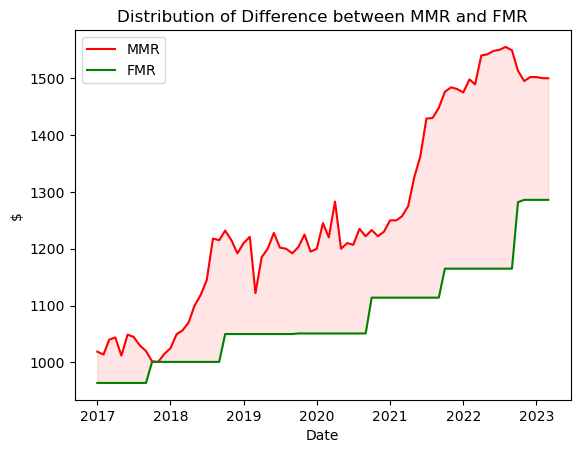

In [10]:
# plot the difference between MMR and FMR
plt.plot(df.date, df.mmr, color='red')
plt.plot(df.date, df.fmr, color='green')
plt.fill_between(df.date, df.mmr, df.fmr, color='red', alpha=0.1)
plt.legend(['MMR', 'FMR'])
plt.xlabel("Date")
plt.ylabel("$")
plt.title('Distribution of Difference between MMR and FMR')
plt.show()

#### What does the San Antonio population look like in comparison to the above chart?

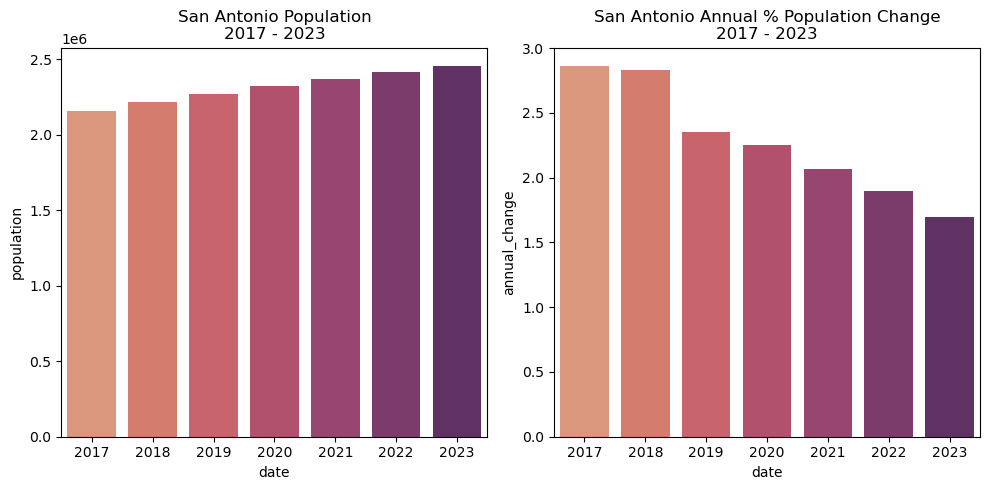

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.barplot(data=pop, x='date', y='population', palette='flare')
plt.title('San Antonio Population\n2017 - 2023')
plt.subplot(122)
sns.barplot(data=pop, x='date', y='annual_change', palette='flare')
plt.title('San Antonio Annual % Population Change\n2017 - 2023')
plt.tight_layout()
plt.show()

    The San Antonio population has increased every year since 2017 however, the annual % population change has simultaniously decreased every year since 2017. I believe this reflects the United States current population trends (I need to verify).
    In comparison to the above chart, it is interesting that as San Antonio's population grows and continues to grow less each year, rent does not seem to reflect this change in growth. While it would make sense for rent to increase due to demand from an increasing population, the rate rent has increase does not account for the rate the population has grown and demands housing.
    Another interesting observation is FMR appears to be more in line with population growth than MMR.
    
    The question then becomes why has MMR increased so much and FMR has not?

In [14]:
pop = pd.read_csv('sa_population.csv')
pop

,date,Population,Annual Change
0,12/31/50,454000,NaN
1,12/31/51,470000,3.52
2,12/31/52,487000,3.62
3,12/31/53,505000,3.70
4,12/31/54,523000,3.56
...,...,...,...
81,12/31/31,2685000,0.90
82,12/31/32,2709000,0.89
83,12/31/33,2732000,0.85
84,12/31/34,2755000,0.84




What does the homeless population look like

college student population

minumum wage changes

major events like covid

what was a living wage at that year

what is the poverty line that year

number of vacant homes and apartments

